# Covid-19 Data Analysis using API

# import libraries

In [20]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
from IPython.display import Image

# get korean font

In [3]:
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

# get API by url

In [4]:
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
params = {'serviceKey' : 'IWgrDM+4GOSJhH0nGL55Ti6Fwuqu2n3XUI62tcyuY/3X9173+MrWx/rSPfcLf0ggEGdktGcg+KtmhAD7p84Hfg==',
         'pageNo' : '1', 'numOfRows' : '10', 'startCreateDt' : '20200410', 'endCreateDt' : '20240211'}

response = requests.get(url, params = params)
soup = BeautifulSoup(response.text, 'lxml-xml')
items = soup.find_all("item")

# get data at API

In [5]:
def parse():
    try:
        STD_DAY = item.find("stdDay").get_text()
        GUBUN = item.find("gubun").get_text()
        INC_DEC = item.find("incDec").get_text()
        DEF_CNT = item.find("defCnt").get_text()
        DEATH_CNT = item.find("deathCnt").get_text()
        ISOL_CLEAR_CNT = item.find("isolClearCnt").get_text()
        OVER_FLOW_CNT = item.find("overFlowCnt").get_text()
        LOCAL_OCC_CNT = item.find("localOccCnt").get_text()
        QUR_RATE = item.find("qurRate").get_text()
        return {
            "기준일시" : STD_DAY,
            "구분" : GUBUN,
            "전일대비 증감 수" : INC_DEC,
            "확진자 수" : DEF_CNT,
            "사망자 수" : DEATH_CNT,
            "격리 해제 수" : ISOL_CLEAR_CNT,
            "해외유입 수" : OVER_FLOW_CNT,
            "지역발생 수" : LOCAL_OCC_CNT,
            "10만명당 발생률" : QUR_RATE
        }
    except AttributeError as e:
        return {
            "기준일시" : np.NaN,
            "구분" : np.NaN,
            "전일대비 증감 수" : np.NaN,
            "확진자 수" : np.NaN,
            "사망자 수" : np.NaN,
            "격리 해제 수" : np.NaN,
            "해외유입 수" : np.NaN,
            "지역발생 수" : np.NaN,
            "10만명당 발생률" : np.NaN
        }

In [6]:
row = []
for item in items:
    row.append(parse())

# create a dataframe using API

In [7]:
df = pd.DataFrame(row)
df = df.iloc[::-1]
df = df.set_index(['기준일시'])
df.tail(19)

,구분,전일대비 증감 수,확진자 수,사망자 수,격리 해제 수,해외유입 수,지역발생 수,10만명당 발생률
기준일시,,,,,,,,
2022년 02월 12일 00시,합계,54941,1294205,7045,770673,113,54828,2506
2022년 02월 12일 00시,서울,13198,374534,2227,243761,9,13189,3939
2022년 02월 12일 00시,부산,3051,59367,368,33688,2,3049,1772
2022년 02월 12일 00시,대구,2370,55126,417,37051,0,2370,2311
2022년 02월 12일 00시,인천,5068,84589,354,48706,9,5059,2869
2022년 02월 12일 00시,광주,1576,28443,105,13011,3,1573,1973
2022년 02월 12일 00시,대전,1511,28638,205,14043,2,1509,1972
2022년 02월 12일 00시,울산,726,15544,67,9997,0,726,1386
2022년 02월 12일 00시,세종,326,5913,4,3755,3,323,1590


In [8]:
plt.style.use('ggplot')

In [9]:
def print_line_graph(division, df):
    fig = plt.figure(figsize = (20, 10))
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3)
    ax4 = fig.add_subplot(2,2,4)
    ax1.plot(df['전일대비 증감 수'].map(int), color = 'olive', linewidth = 2)
    ax2.plot(df['확진자 수'].map(int), color = 'skyblue', linewidth = 2)
    ax3.plot(df['사망자 수'].map(int), color = 'magenta', linewidth = 2)
    ax4.plot(df['10만명당 발생률'].map(float), color = 'yellow', linewidth = 2)
    ax1.set_title(division + ' 신규 확진자 수', size= 15)
    ax2.set_title(division + ' 누적 확진자 수', size= 15)
    ax3.set_title(division + ' 누적 사망자 수', size= 15)
    ax4.set_title(division + ' 10만명당 발생률', size= 15)
    ax1.axes.xaxis.set_ticks([])
    ax2.axes.xaxis.set_ticks([])
    ax3.axes.xaxis.set_ticks([])
    ax4.axes.xaxis.set_ticks([])
    plt.show()

# graph of confirmed cases by region

## nation wide

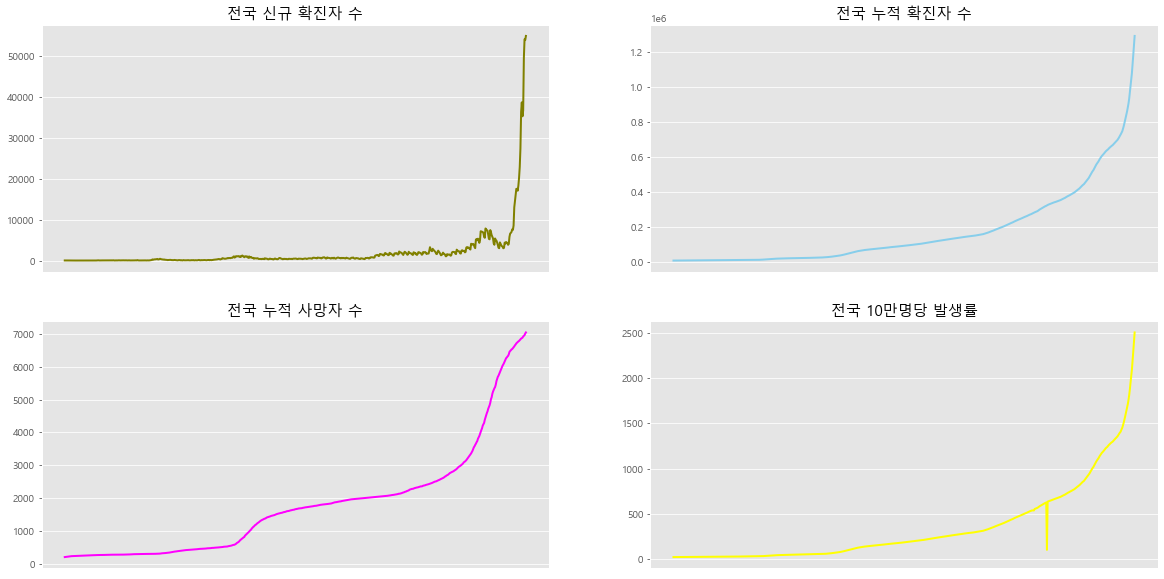

In [10]:
mask = (df['구분'] == '합계')
df_sum = df[mask]
print_line_graph('전국', df_sum)

## seoul

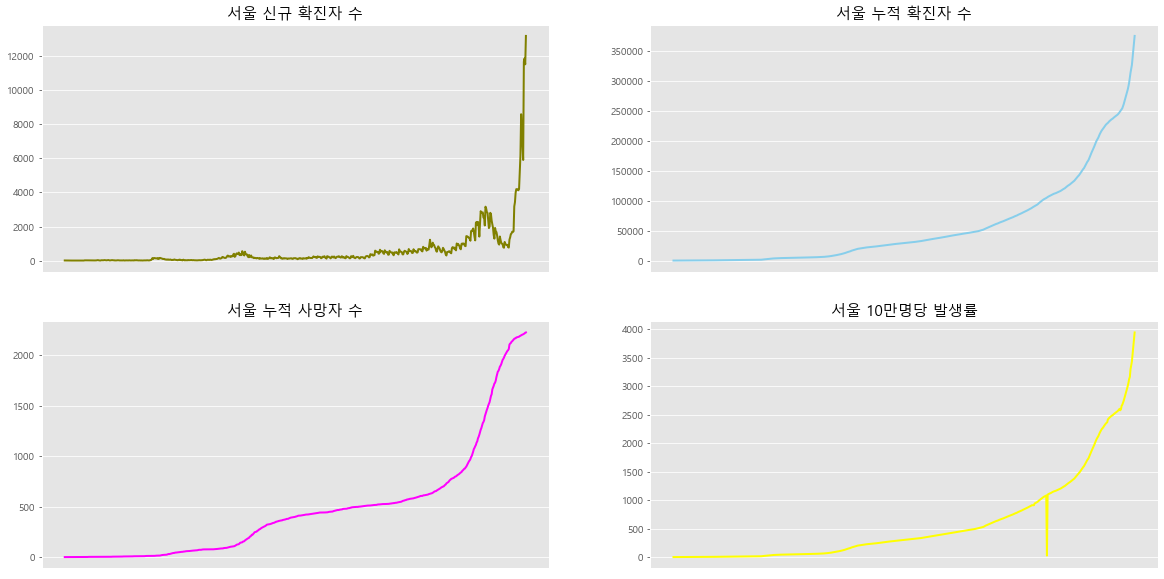

In [11]:
mask = (df['구분'] == '서울')
df_seoul = df[mask]
print_line_graph('서울', df_seoul)

## busan

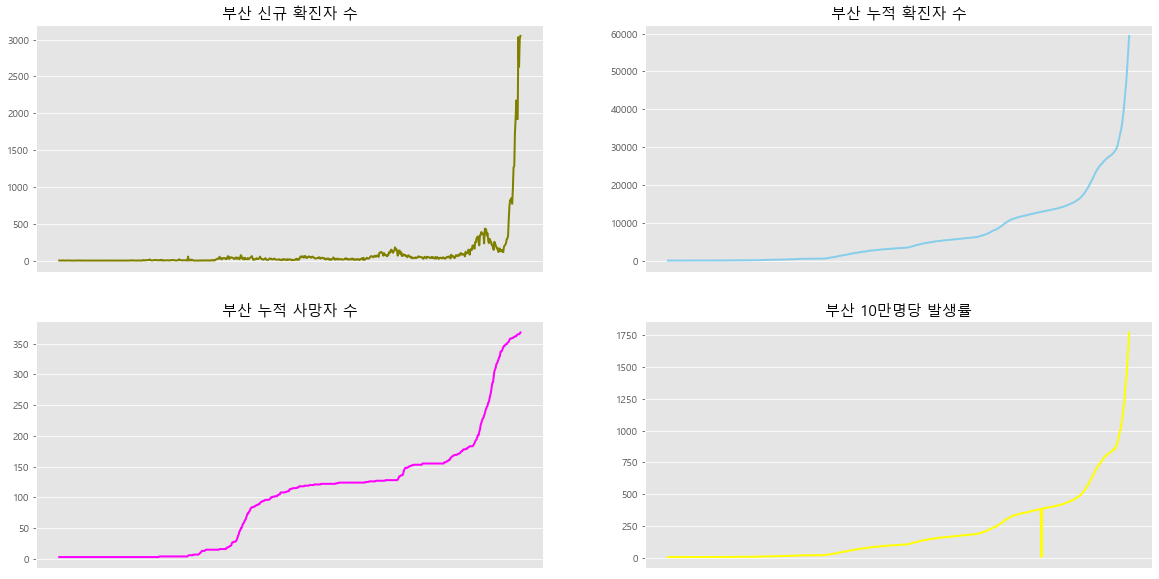

In [12]:
mask = df['구분'] == '부산'
df_busan = df[mask]
print_line_graph('부산', df_busan)

## daegu

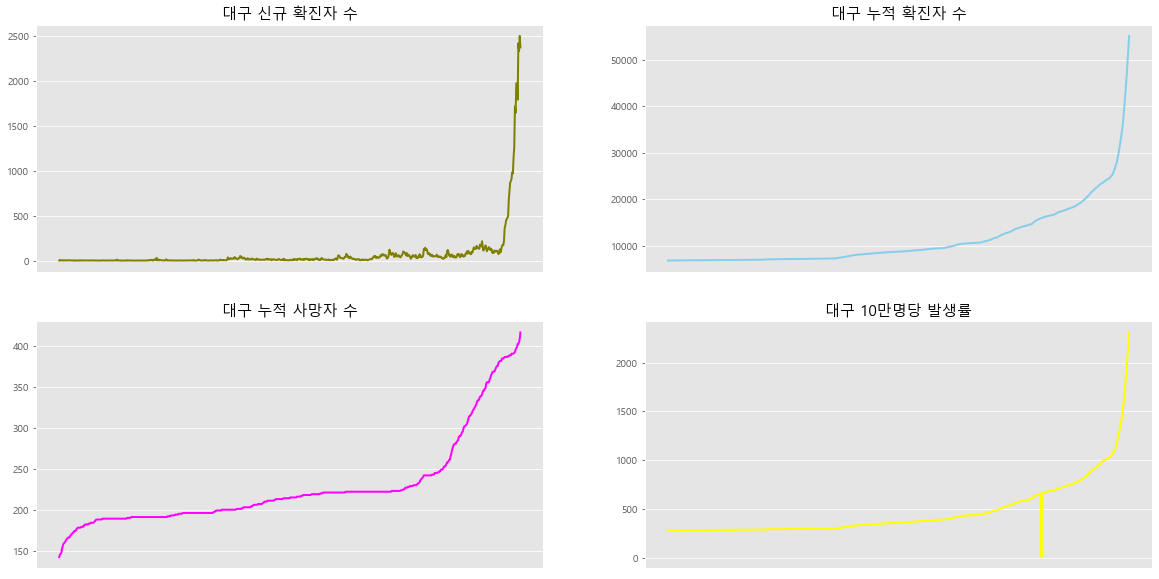

In [13]:
mask = df['구분'] == '대구'
df_daegu = df[mask]
print_line_graph('대구', df_daegu)

## incheon

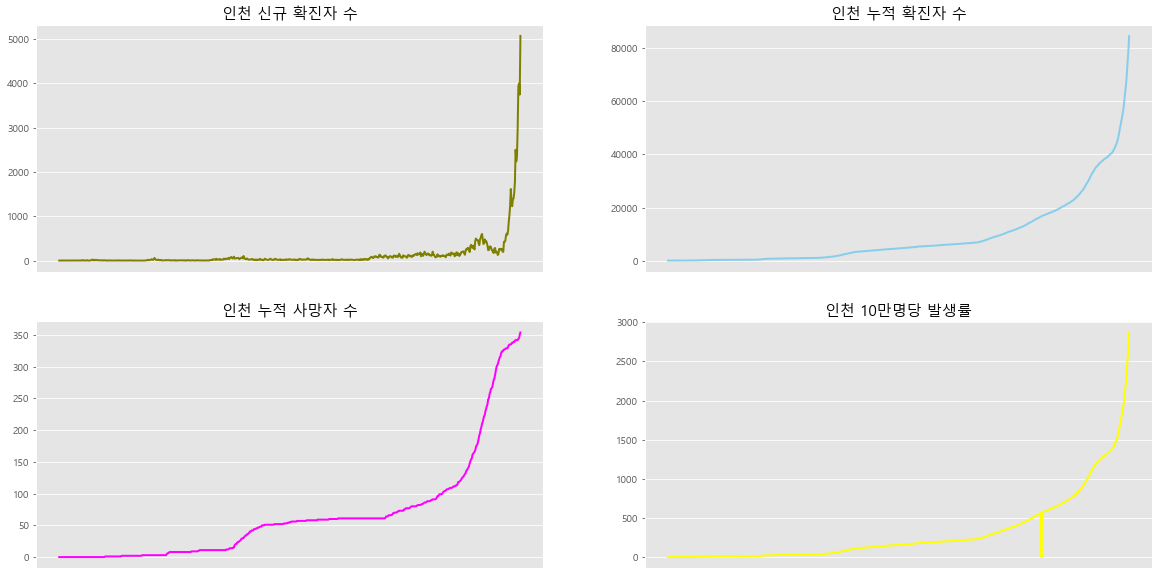

In [14]:
mask = df['구분'] == '인천'
df_incheon = df[mask]
print_line_graph('인천', df_incheon)

## gwangju

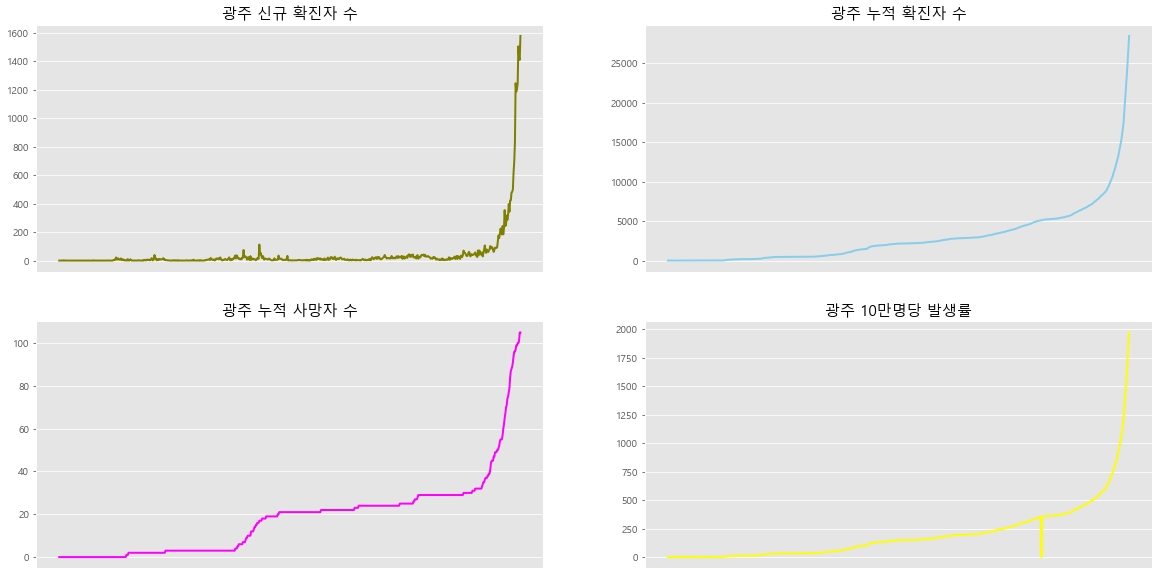

In [15]:
mask = df['구분'] == '광주'
df_gwangju = df[mask]
print_line_graph('광주', df_gwangju)

## daejeon

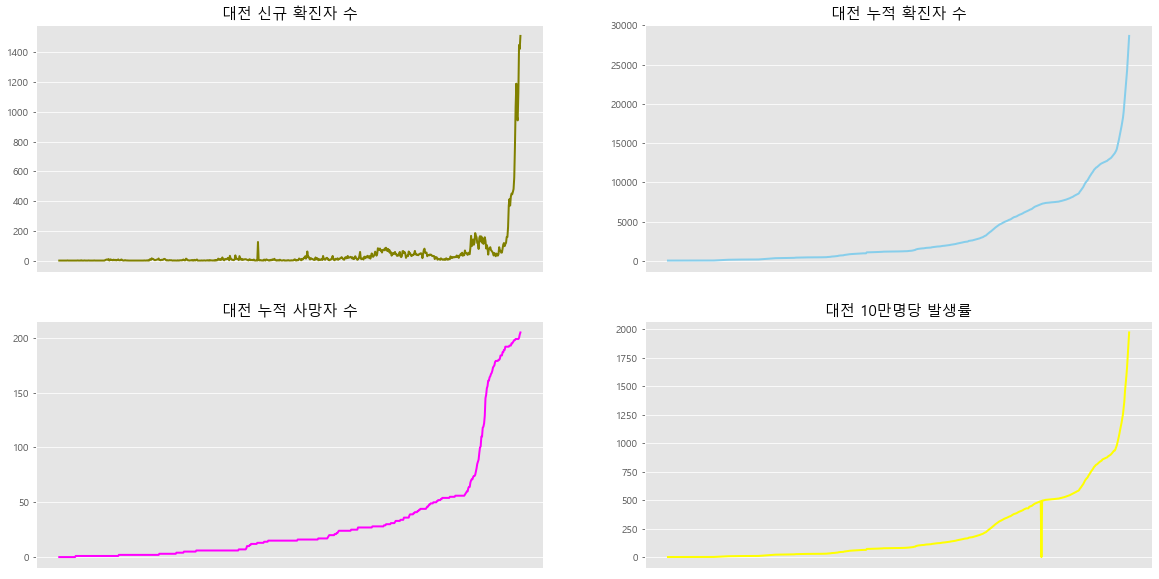

In [16]:
mask = df['구분'] == '대전'
df_daejeon = df[mask]
print_line_graph('대전', df_daejeon)

## ulsan

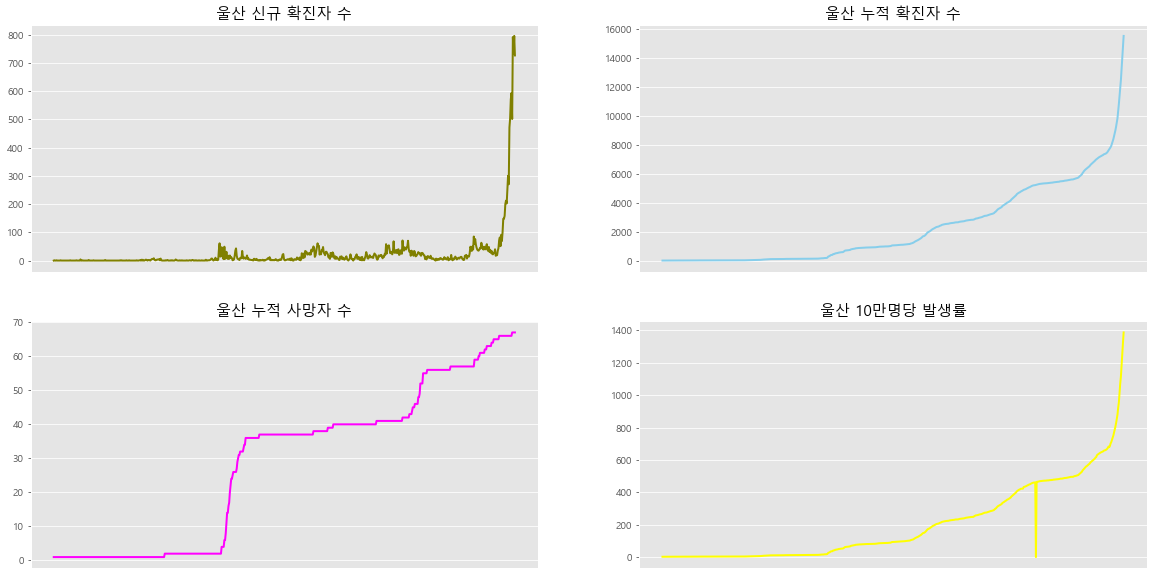

In [17]:
mask = df['구분'] == '울산'
df_ulsan = df[mask]
print_line_graph('울산', df_ulsan)

## sejong

C:\Users\bl4an\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bl4an\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


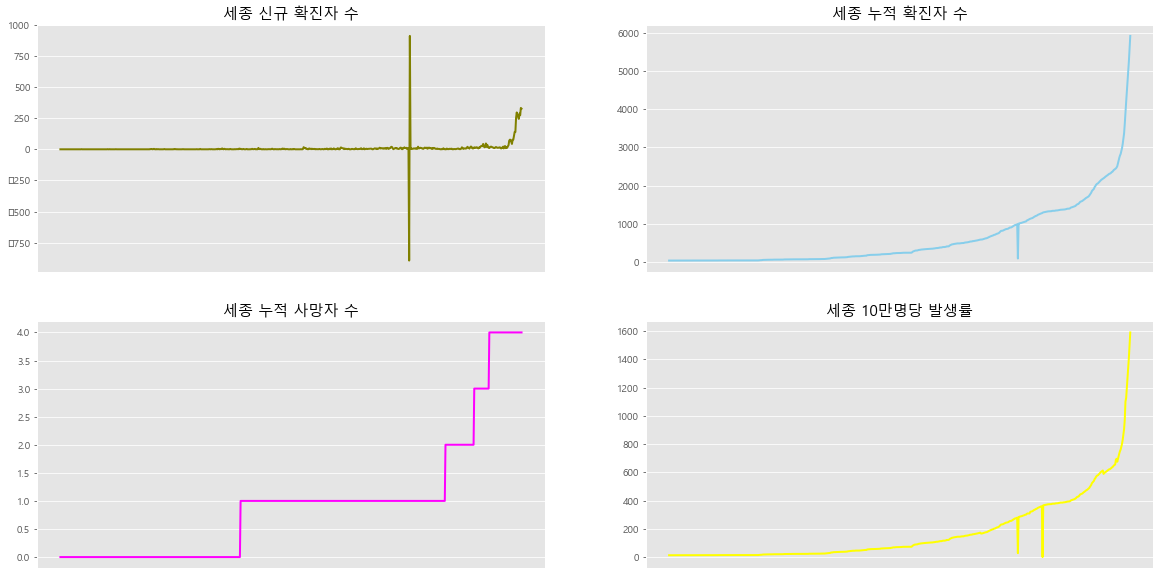

In [18]:
mask = df['구분'] == '세종'
df_sejong = df[mask]
print_line_graph('세종', df_sejong)

## gyeonggi

ValueError: could not convert string to float: '657.29*'

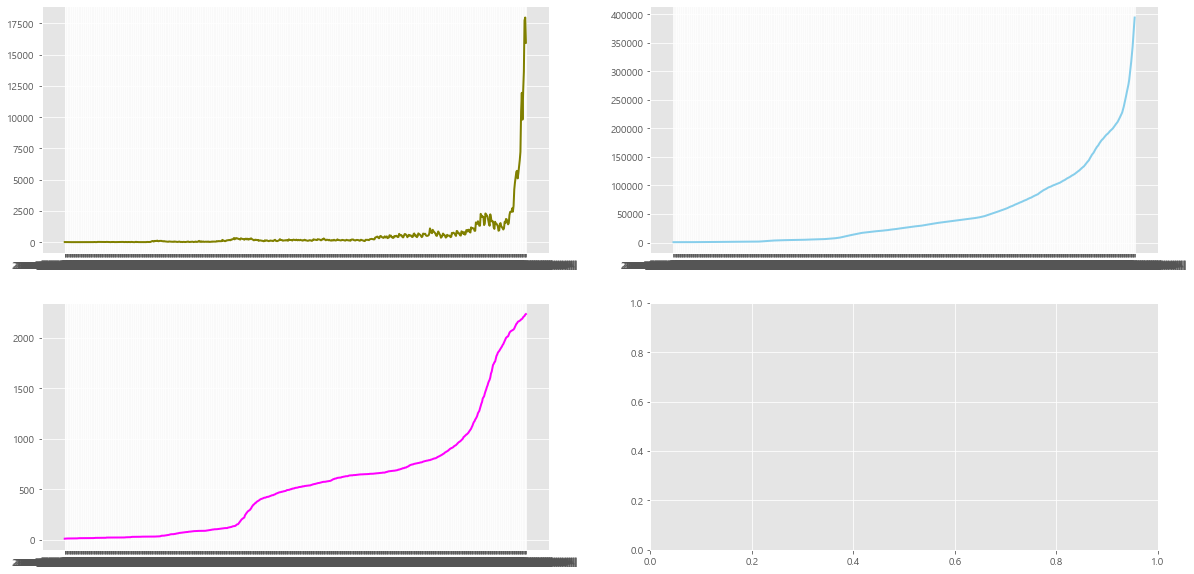

In [19]:
mask = df['구분'] == '경기'
df_gyeonggi = df[mask]
print_line_graph('경기', df_gyeonggi)

## gangwon

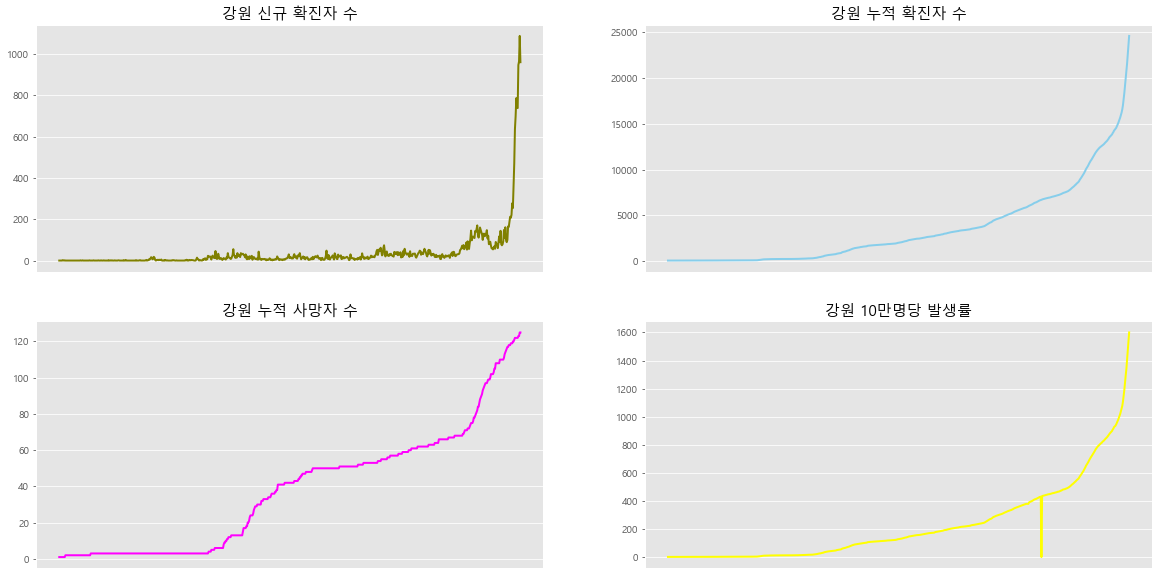

In [21]:
mask = df['구분'] == '강원'
df_gangwon = df[mask]
print_line_graph('강원', df_gangwon)

## chungbuk

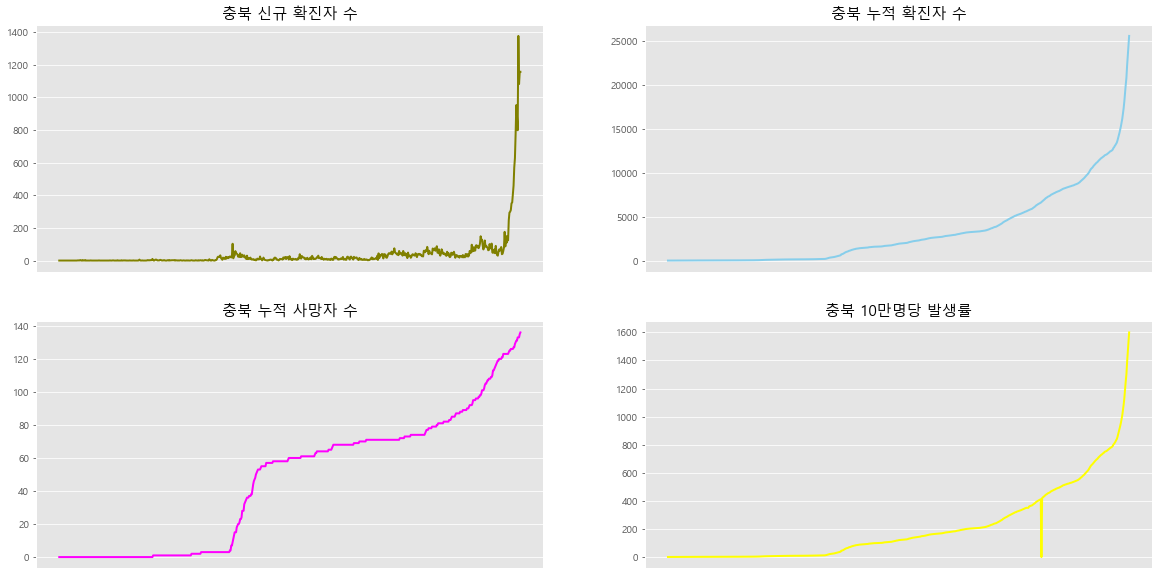

In [22]:
mask = df['구분'] == '충북'
df_chungbuk = df[mask]
print_line_graph('충북', df_chungbuk)

## chungnam

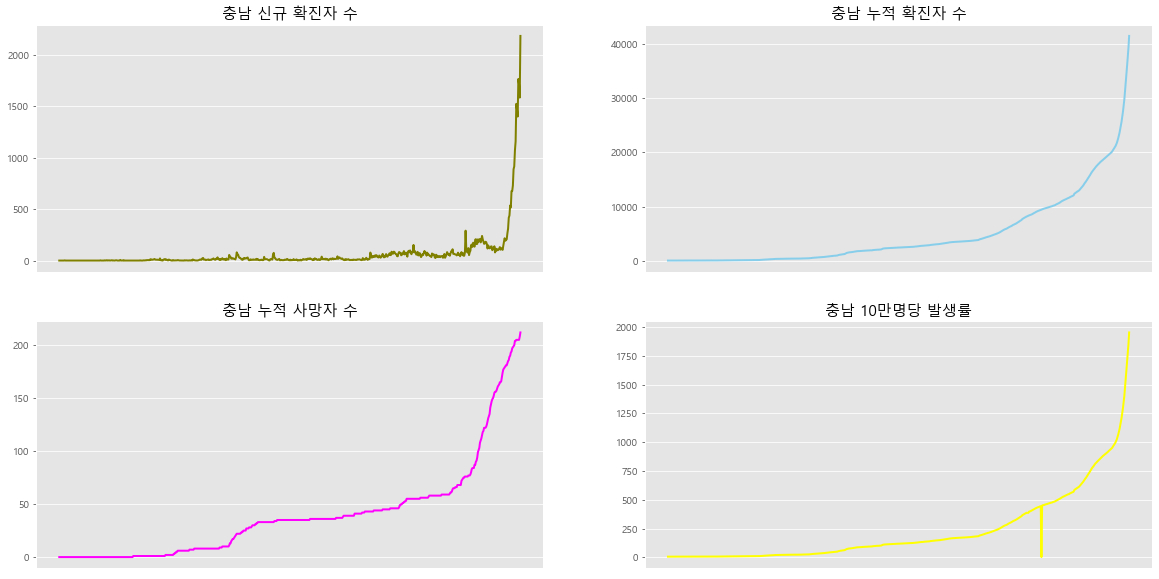

In [23]:
mask = df['구분'] == '충남'
df_chungnam = df[mask]
print_line_graph('충남', df_chungnam)

## jeonbuk

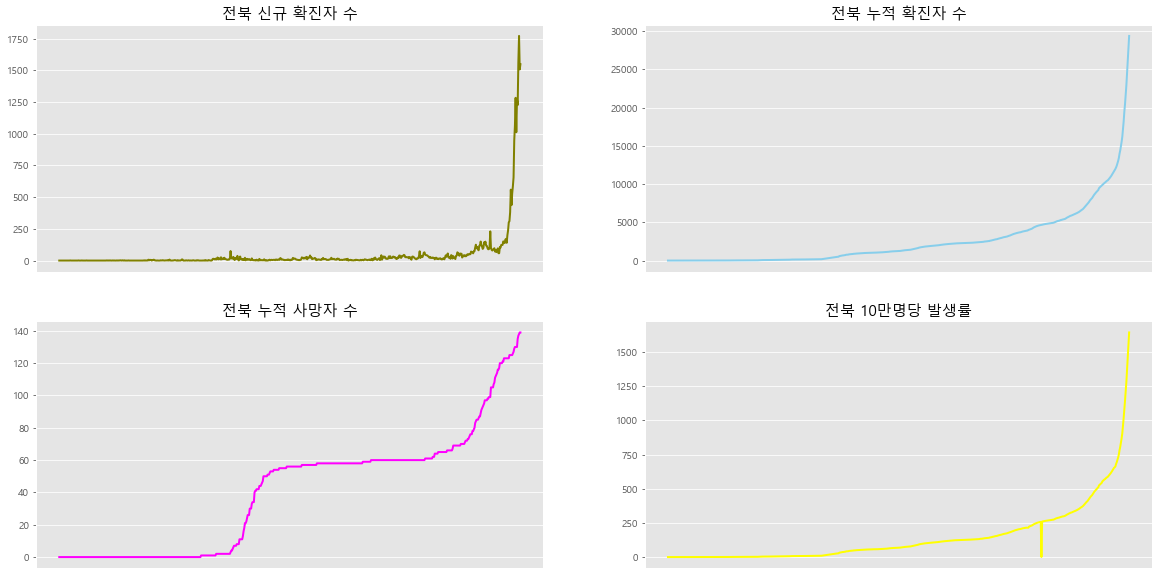

In [24]:
mask = df['구분'] == '전북'
df_jeonbuk = df[mask]
print_line_graph('전북', df_jeonbuk)

## jeonnam

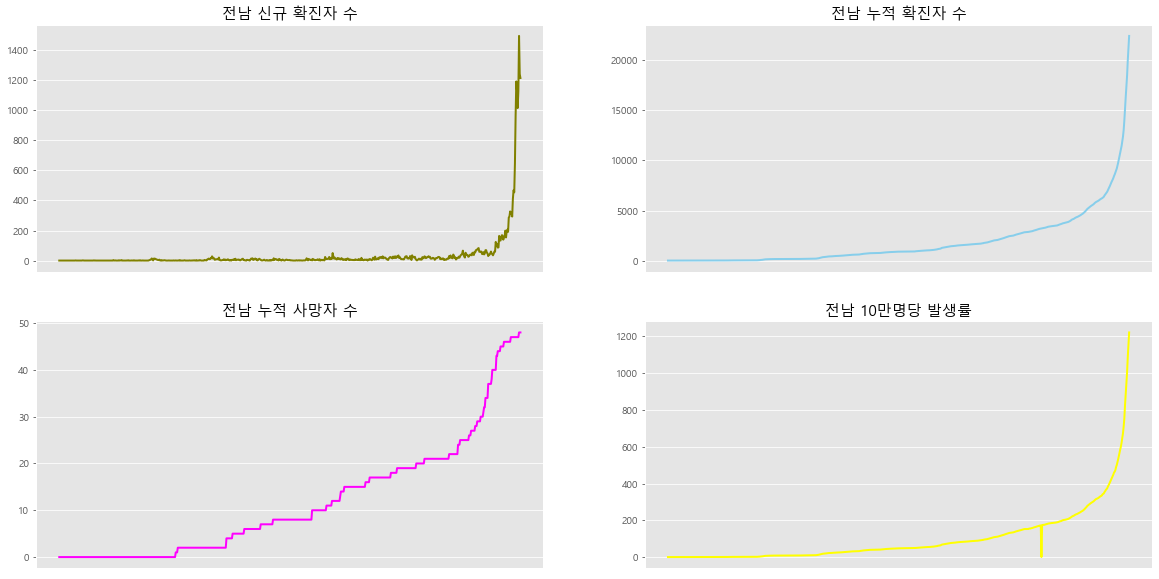

In [25]:
mask = df['구분'] == '전남'
df_jeonnam = df[mask]
print_line_graph('전남', df_jeonnam)

## gyeongbuk

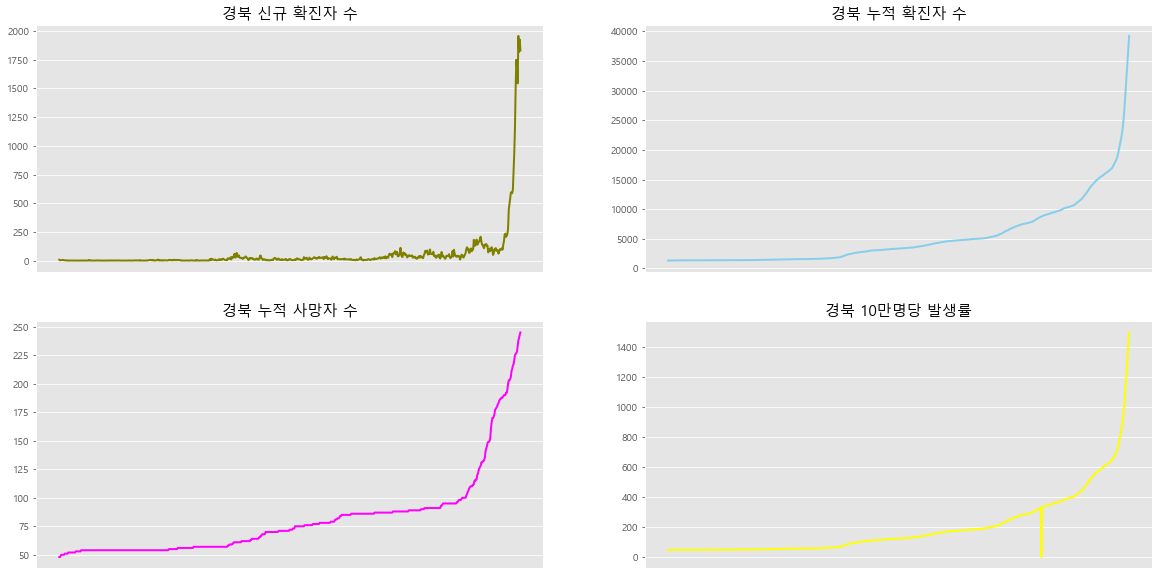

In [26]:
mask = df['구분'] == '경북'
df_gyeongbuk = df[mask]
print_line_graph('경북', df_gyeongbuk)

## gyeongnam

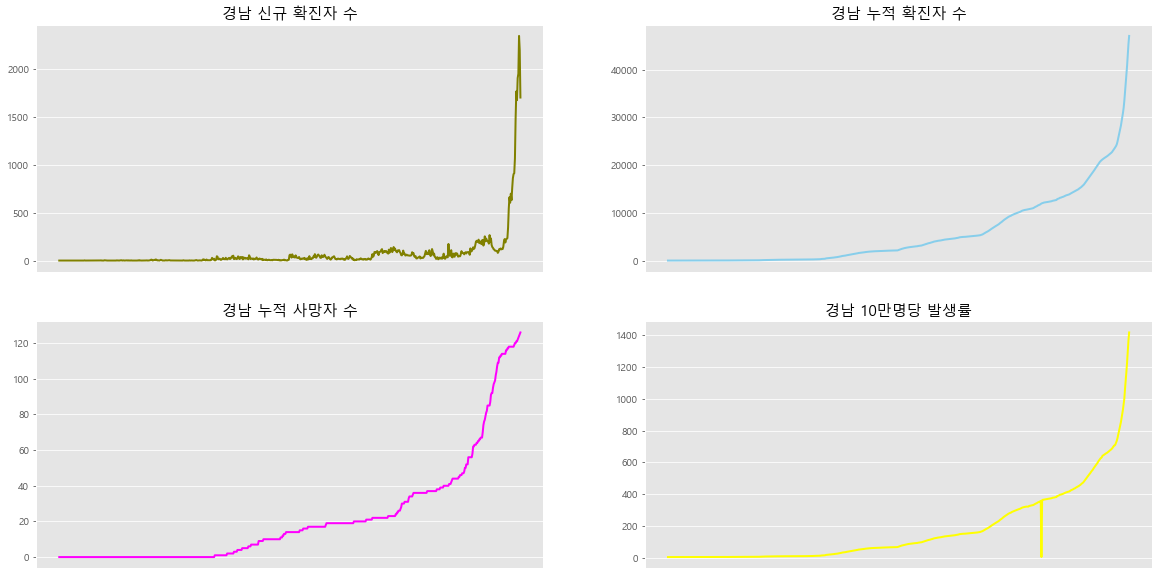

In [27]:
mask = df['구분'] == '경남'
df_gyeongnam = df[mask]
print_line_graph('경남', df_gyeongnam)

## jeju

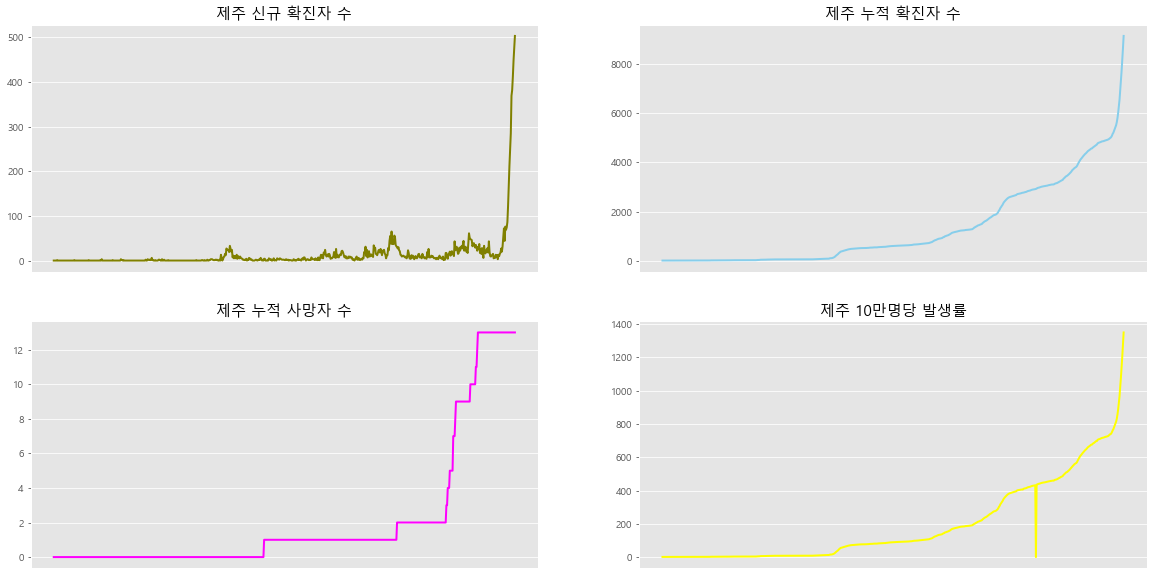

In [28]:
mask = df['구분'] == '제주'
df_jeju = df[mask]
print_line_graph('제주', df_jeju)

# create a dataframe for the map

In [29]:
df_geo = df.iloc[-18:-1]
df_geo = df_geo.set_index(['구분'])
index = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시',
        '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주도']
df_geo = pd.Series(df_geo['10만명당 발생률'].map(float))
df_geo = df_geo.rename(index = {'서울' : '서울특별시',
                               '부산' : '부산광역시',
                               '대구' : '대구광역시',
                               '인천' : '인천광역시',
                               '광주' : '광주광역시',
                               '대전' : '대전광역시',
                               '울산' : '울산광역시',
                               '세종' : '세종특별자치시',
                               '경기' : '경기도',
                               '강원' : '강원도',
                               '충북' : '충청북도',
                               '충남' : '충청남도',
                               '전북' : '전라북도',
                               '전남' : '전라남도',
                               '경북' : '경상북도',
                               '경남' : '경상남도',
                               '제주' : '제주특별자치도'})
df_geo = pd.DataFrame(df_geo)

# confirmed cases per 100,000 by region

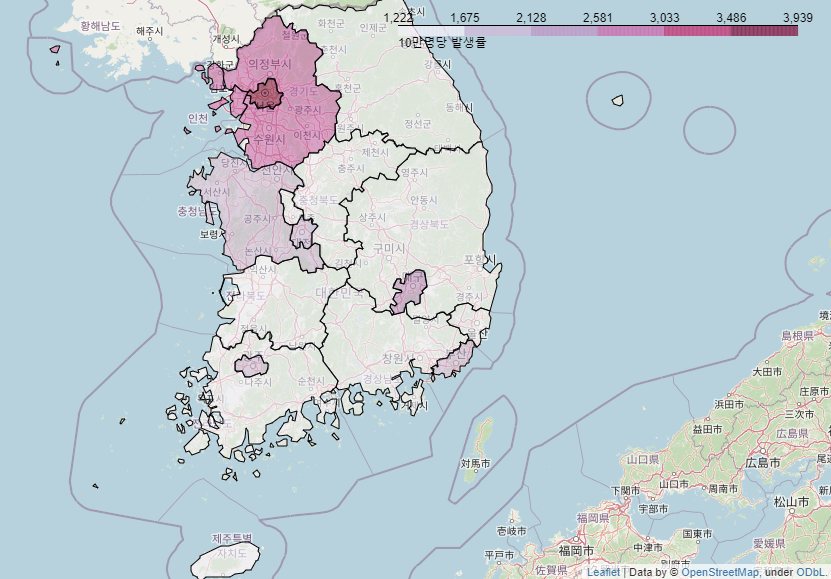

In [30]:
geo_path = './korea_city_borderline.json'
try:
    geo_data = json.load(open(geo_path, encoding = 'utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding = 'utf-8-sig'))
map_covid = folium.Map(location=[37,127], zoom_start = 7)
folium.Choropleth(geo_data = geo_data,
                  data = df_geo["10만명당 발생률"],
                  columns = [df_geo.index, df_geo["10만명당 발생률"]],
                  key_on='feature.properties.CTP_KOR_NM',
                  fill_color='PuRd',
                  legend_name = '10만명당 발생률').add_to(map_covid)
Image('map.png')

# analyze the correlate between the number of confirmed cases and the number of deaths using machine learning

## make dataframe to use at machine learning

In [30]:
mask = (df['구분'] == '합계')
df_machine_learning = df[mask]
df_machine_learning = df_machine_learning.reset_index()
df_machine_learning = df_machine_learning[['전일대비 증감 수', '확진자 수', '사망자 수', '격리 해제 수']]

## divide into train data and test data

In [31]:
X = df_machine_learning[['확진자 수']].astype('int')
y = df_machine_learning['사망자 수'].astype('int')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

## import LinearRegression instance and PolynomialFeatures instance

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## create a first-order object poly

In [33]:
poly = PolynomialFeatures(degree=1)
X_train_poly=poly.fit_transform(X_train)

## model training with train data

In [34]:
pr = LinearRegression()   
pr.fit(X_train_poly, y_train)

LinearRegression()

## calculate the coefficient of determination by applying the test data to the trained model

In [35]:
X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly,y_test)

## output a scatter plot of train data and a regression line predicted by test data as a graph

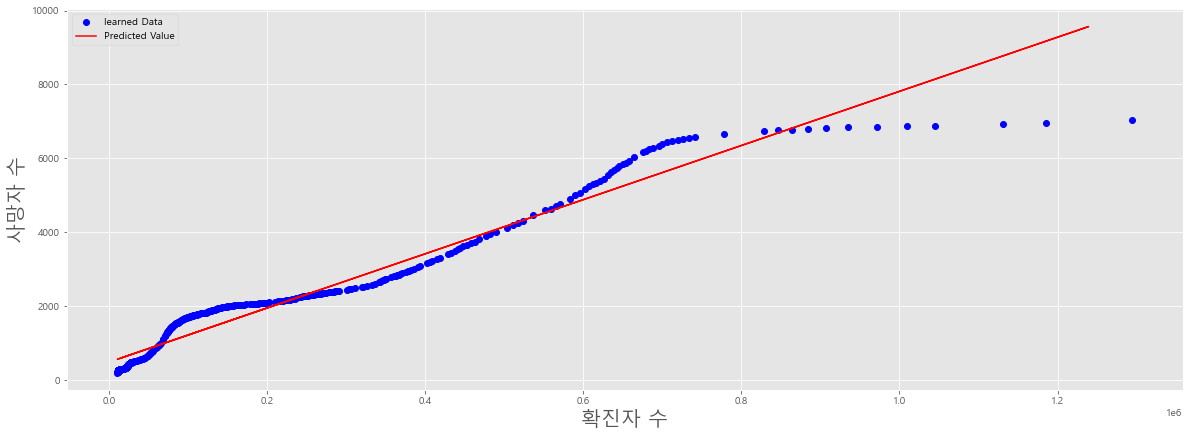

In [36]:
y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='learned Data', color = 'blue')
ax.plot(X_test, y_hat_test, 'r-', label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('확진자 수', size = 20)
plt.ylabel('사망자 수', size = 20)
plt.show()
plt.close()

## Enter full data into the model to compare predicted values to actual values

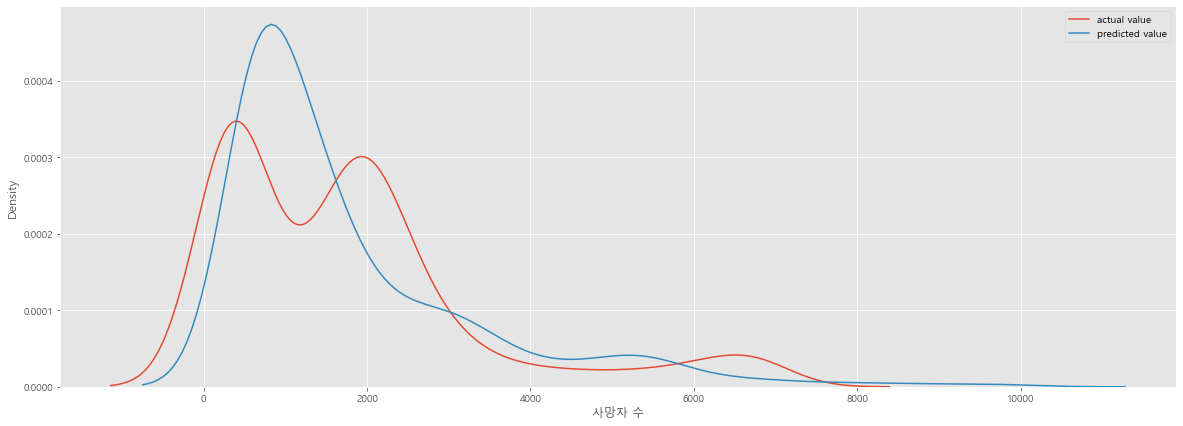

In [37]:
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(20, 7))
ax1 = sns.kdeplot(y, label="actual value")
ax2 = sns.kdeplot(y_hat, label="predicted value", ax=ax1)
plt.legend()
plt.show()